In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [3]:
A = use('bhsa', hoist=globals())

	connecting to online GitHub repo annotation/app-bhsa ... connected
	code/__init__.py...downloaded


C:\Users\Oliver Glanz\Anaconda3\lib\site-packages\tf\applib\repo.py:391: DeprecationWarning: Call to deprecated method get_dir_contents. (
        Repository.get_dir_contents() is deprecated, use
        Repository.get_contents() instead.
        )
  contents = g.get_dir_contents(subPath, ref=commit)


	code/app.py...downloaded
	code/config.yaml...downloaded
	code/static...directory
		code/static/logo.png...

C:\Users\Oliver Glanz\Anaconda3\lib\site-packages\tf\applib\repo.py:391: DeprecationWarning: Call to deprecated method get_dir_contents. (
        Repository.get_dir_contents() is deprecated, use
        Repository.get_contents() instead.
        )
  contents = g.get_dir_contents(subPath, ref=commit)


downloaded
	OK
Using TF-app in C:\Users\Oliver Glanz/text-fabric-data/annotation/app-bhsa/code:
	rv2.0.4=#7b3b9ffba7ee6dbc76a52b8d76475d17babf0daf (latest release)


findAppClass: cannot import name 'App' from 'tf.applib.app' (C:\Users\Oliver Glanz\Anaconda3\lib\site-packages\tf\applib\app.py)


findAppClass: Api for "bhsa" not found


# Paragogic Nun

In [18]:
ParagogicNun = '''
word vbe
'''
ParagogicNun  = A.search(ParagogicNun)
A.table(ParagogicNun, start=1, end=7, condensed=True)

## see SHEBANQ query results here: https://shebanq.ancient-data.org/hebrew/query?version=4b&id=1365 

  0.96s 426584 results


In [19]:
A.export(ParagogicNun, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='ParagogicNun.tsv')

In [20]:
ParagogicNun=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/ParagogicNun.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
ParagogicNun.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,vbe1
0,1,Genesis,1,1,1,word,בְּ,NaN
1,2,Genesis,1,1,2,word,רֵאשִׁ֖ית,NaN
2,3,Genesis,1,1,3,word,בָּרָ֣א,NaN
3,4,Genesis,1,1,4,word,אֱלֹהִ֑ים,NaN
4,5,Genesis,1,1,5,word,אֵ֥ת,NaN


The code cell below shows that there are 573 clauses in which we find a verbal predicate with YHWH as subject.

In [21]:
ParagogicNun["vbe1"].value_counts()

W      12801
TJ      3049
T       2085
H       1385
H=       935
TM       825
J        549
WN       381
NW       370
NH       358
T=       249
T==       34
N>        11
TN        10
JN         7
TWN        3
N          3
Name: vbe1, dtype: int64

In [17]:
ParagogicNunInContext = '''
verse
  word vbe~JN$
'''
ParagogicNunInContext  = A.search(ParagogicNunInContext)
A.show(ParagogicNunInContext, start=1, end=7, condensed=True)

  0.63s 7 results


**Conclusion**: Paragogic nun only appears at the end of vocalic verbal (yiqtol endings). The vast majority appears after the plural W ending while only 7 cases appear after the singular feminine Yod ending. Also, the WN ending appears much more frequently then the NW or NH endings as can be seen below:


In [22]:
F.vbe.freqList()

(('n/a', 352874),
 ('', 50655),
 ('W', 12801),
 ('TJ', 3049),
 ('T', 2085),
 ('H', 1385),
 ('H=', 935),
 ('TM', 825),
 ('J', 549),
 ('WN', 381),
 ('NW', 370),
 ('NH', 358),
 ('T=', 249),
 ('T==', 34),
 ('N>', 11),
 ('TN', 10),
 ('JN', 7),
 ('N', 3),
 ('TWN', 3))

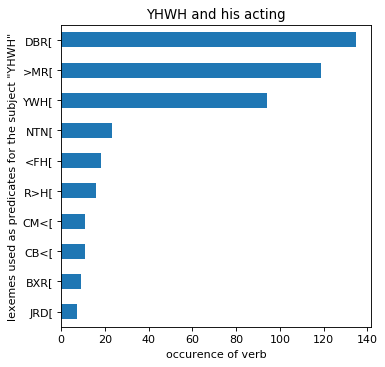

In [20]:
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
YHWH2reduced.groupby("lex6").size().sort_values(ascending=True).plot.barh()
plt.xlabel('occurence of verb')
plt.ylabel('lexemes used as predicates for the subject "YHWH"')
plt.title('YHWH and his acting')
plt.show()

#### Pie Chart

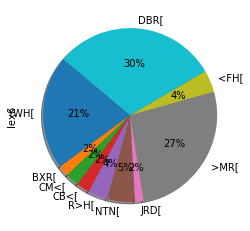

In [21]:
YHWH2reduced.lex6.value_counts(sort=False).plot.pie(autopct='%1.0f%%', shadow=True, startangle=140)
plt.show()

#### Scatter Plot

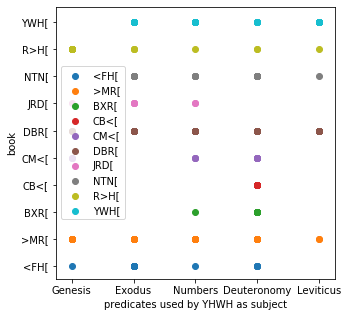

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

for S1, df in YHWH2reduced.groupby('lex6'):
    ax.scatter(x="S1", y="lex6", data=df, label=S1)

ax.set_xlabel("predicates used by YHWH as subject")
ax.set_ylabel("book")
ax.legend();

#### Seaborn Implot (sophisticated scatter plot)

Text(0.5, 20.799999999999983, 'OT books')

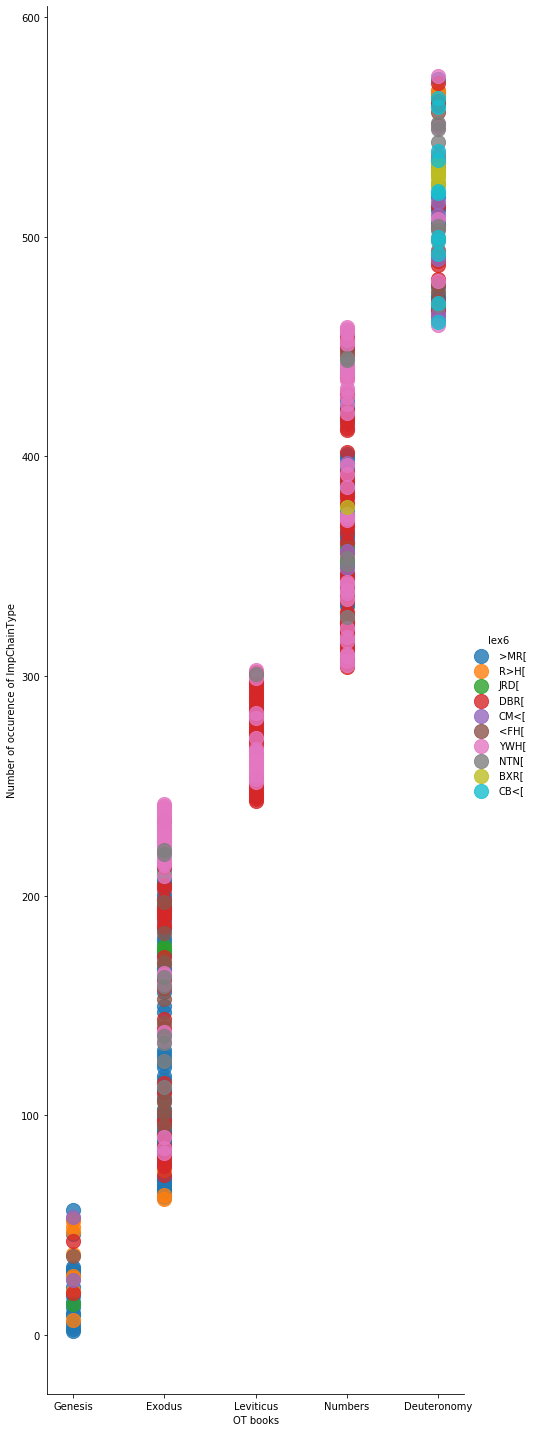

In [23]:
sns.lmplot(x="S1", y="R", data=YHWH2reduced, hue='lex6', height=20, aspect=1/3, fit_reg=False, scatter_kws={"s": 200})
ax = plt.gca()
ax.set_ylabel('Number of occurence of ImpChainType')
ax.set_xlabel('OT books')

### Searching on the CLAUSE-level
#### Simple sentence search
Lets search for a sentence that contains two clauses in Genesis 20.

In [24]:
ClausesinSentence1='''
chapter book=Genesis chapter=20
    sentence
        clause
        <: clause
'''
ClausesinSentence1 = A.search(ClausesinSentence1)
A.show(ClausesinSentence1, start=1, end=2, condensed=True, colorMap={1: 'yellow', 2: 'yellow', 3: 'cyan', 4: 'magenta'})

## SHEBANQ query result: https://shebanq.ancient-data.org/hebrew/query?version=4b&id=1369

  1.43s 11 results


#### Advanced sentence search
Now we are searching for a sentence that contains an independent clause and a dependent attributive/relative clause in Gen 20.

In [25]:
ClausesinSentence2='''
chapter book=Genesis chapter=20
    sentence
        clause
        <: clause rela=Attr
'''
ClausesinSentence2 = A.search(ClausesinSentence2)
A.show(ClausesinSentence2, start=1, end=2, condensed=True, colorMap={1: 'yellow', 2: 'yellow', 3: 'cyan', 4: 'magenta'})

## SHEBANQ query result: https://shebanq.ancient-data.org/hebrew/query?version=4b&id=1370 

  1.35s 2 results


##### Codes for clause relations (rela)
A full list of clause relations can be found here: 
https://etcbc.github.io/bhsa/features/rela/

code|description
---|---
`Adju`|Adjunctive clause
`Attr`|Attributive clause
`Cmpl`|Complement clause
`Coor`|Coordinated clause
`Objc`|Object clause
`PrAd`|Predicative adjunct clause
`PreC`|Predicative complement clause
`ReVo`|Referral to the vocative
`Resu`|Resumptive clause
`RgRc`|Regens/rectum connection
`Spec`|Specification clause
`Subj`|Subject clause

# What codes? What abbreviations?
As the above examples have shown, one cannot run any queries succesfully without knowing 2 things:
1. What is the database model (what are clauses, phrases, words, etc.)?
2. What are the codes used for signifying tenses, stems, part of speech, etc.?

While we will tackle the the first question in our next session the second question can be answered in the ETBCB's online version of its features doc: https://etcbc.github.io/bhsa/features/0_home/

# In Class Tasks
For all assignments listed below I advise you to use https://shebanq.ancient-data.org/hebrew/text to inspect the text, copy/paste codes and words into your TF search cells.
1. Find all cases in which David appears in 2 Samuel 1-5.
2. Find all cases in which David appears as subject in 2 Samuel 1-5.
4. Find all cases in which David does something to somebody/something, i.e. you need to find the object phrase within a clause in which David is subject and does (predicate) something.

In [26]:
# Task 1: Find all cases in which David appears in 2 Samuel 1-5.
David1='''
verse book=Samuel_II chapter=1|2|3|4|5
    word lex=DWD==/
'''
David1  = A.search(David1)
A.table(David1, start=1, end=2, condensed=False, colorMap={2: 'cyan'})

  3.14s 86 results


n,p,verse,word
1,2_Samuel 1:1,וַיְהִ֗י אַֽחֲרֵי֙ מֹ֣ות שָׁא֔וּל וְדָוִ֣ד שָׁ֔ב מֵהַכֹּ֖ות אֶת־הָעֲמָלֵ֑ק וַיֵּ֧שֶׁב דָּוִ֛ד בְּצִקְלָ֖ג יָמִ֥ים שְׁנָֽיִם׃,דָוִ֣ד
2,2_Samuel 1:1,וַיְהִ֗י אַֽחֲרֵי֙ מֹ֣ות שָׁא֔וּל וְדָוִ֣ד שָׁ֔ב מֵהַכֹּ֖ות אֶת־הָעֲמָלֵ֑ק וַיֵּ֧שֶׁב דָּוִ֛ד בְּצִקְלָ֖ג יָמִ֥ים שְׁנָֽיִם׃,דָּוִ֛ד


In [27]:
# Task 2: Find all cases in which David appears as subject in 2 Samuel 1-5.
David2='''
verse book=Samuel_II chapter=1|2|3|4|5
    phrase function=Subj
        word lex=DWD==/
'''
David2  = A.search(David2)
A.table(David2, start=1, end=2, condensed=False, colorMap={2: 'magenta', 3: 'cyan'})

  4.66s 49 results


n,p,verse,phrase,word
1,2_Samuel 1:1,וַיְהִ֗י אַֽחֲרֵי֙ מֹ֣ות שָׁא֔וּל וְדָוִ֣ד שָׁ֔ב מֵהַכֹּ֖ות אֶת־הָעֲמָלֵ֑ק וַיֵּ֧שֶׁב דָּוִ֛ד בְּצִקְלָ֖ג יָמִ֥ים שְׁנָֽיִם׃,דָוִ֣ד,דָוִ֣ד
2,2_Samuel 1:1,וַיְהִ֗י אַֽחֲרֵי֙ מֹ֣ות שָׁא֔וּל וְדָוִ֣ד שָׁ֔ב מֵהַכֹּ֖ות אֶת־הָעֲמָלֵ֑ק וַיֵּ֧שֶׁב דָּוִ֛ד בְּצִקְלָ֖ג יָמִ֥ים שְׁנָֽיִם׃,דָּוִ֛ד,דָּוִ֛ד


In [28]:
# Task 3: Find all cases in which David does something to somebody/something, 
# i.e. you need to find the object phrase within a clause in which David is subject and does (predicate) something.
David3='''
verse book=Samuel_II chapter=1|2|3|4|5
    clause
        phrase function=Subj
            word lex=DWD==/
        phrase function=Objc
            word lex*
        phrase function=Pred
            word lex*
'''
David3  = A.search(David3)
A.table(David3, start=1, end=2, condensed=False, colorMap={2: 'blue', 3: 'blue', 4: 'lime', 5: 'red', 6: 'yellow', 7: 'blue', 8: 'cyan'})

    18s 31 results


n,p,verse,clause,phrase,word,phrase,word,phrase,word
1,2_Samuel 1:17,וַיְקֹנֵ֣ן דָּוִ֔ד אֶת־הַקִּינָ֖ה הַזֹּ֑את עַל־שָׁא֖וּל וְעַל־יְהֹונָתָ֥ן בְּנֹֽו׃,וַיְקֹנֵ֣ן דָּוִ֔ד אֶת־הַקִּינָ֖ה הַזֹּ֑את עַל־שָׁא֖וּל וְעַל־יְהֹונָתָ֥ן בְּנֹֽו׃,דָּוִ֔ד,דָּוִ֔ד,אֶת־הַקִּינָ֖ה הַזֹּ֑את,אֶת־,יְקֹנֵ֣ן,יְקֹנֵ֣ן
2,2_Samuel 1:17,וַיְקֹנֵ֣ן דָּוִ֔ד אֶת־הַקִּינָ֖ה הַזֹּ֑את עַל־שָׁא֖וּל וְעַל־יְהֹונָתָ֥ן בְּנֹֽו׃,וַיְקֹנֵ֣ן דָּוִ֔ד אֶת־הַקִּינָ֖ה הַזֹּ֑את עַל־שָׁא֖וּל וְעַל־יְהֹונָתָ֥ן בְּנֹֽו׃,דָּוִ֔ד,דָּוִ֔ד,אֶת־הַקִּינָ֖ה הַזֹּ֑את,הַ,יְקֹנֵ֣ן,יְקֹנֵ֣ן


# Using `regular expressions` for WORD searches
Some queries require sophisticated flexibility. Imagine you want to find all verbs that have a guttural in the the third root consonant (e.g. Verba Tertiae Gutturalis). In such a case you do not want to search lexemes but the consonants that appear in lexemes. For those cases **regular expressions** are very helpful. Regular expressions are enabled by replacing the sign `=`  with `~`:

In [29]:
VerbaTertiaeGutturalis1='''
word sp=verb lex~[>BGDHWZXVJKLMNS<PYQRFCT][>BGDHWZXVJKLMNS<PYQRFCT][><RXH] lex_utf8*
'''
VerbaTertiaeGutturalis1  = A.search(VerbaTertiaeGutturalis1)
A.table(VerbaTertiaeGutturalis1, start=1, end=2, condensed=False, colorMap={1: 'magenta'})

  5.56s 42122 results


n,p,word
1,Genesis 1:1,בָּרָ֣א
2,Genesis 1:2,הָיְתָ֥ה


## `lex` instead of `word`
Obviously the `A.table` does not show the actual lexeme but the actual word in its inflected form. This is because we have chosen for the `object type` "word". But we can change this by choosing the `object type` "lex" instead. Yet, this might be confusing since you know "lex" as a feature of the `object type` "word". But in TF lex can be both a feature of "word" and an `object type` itself. Using "lex" as an object type category is really helpful in our case as we can now show in the table the actual lexeme rather than the word.

In [30]:
VerbaTertiaeGutturalis2='''
lex sp=verb lex~[>BGDHWZXVJKLMNS<PYQRFCT][>BGDHWZXVJKLMNS<PYQRFCT][><RXH]  lex_utf8*
'''
VerbaTertiaeGutturalis2  = A.search(VerbaTertiaeGutturalis2)
A.table(VerbaTertiaeGutturalis2, start=1, end=2, condensed=False, colorMap={1: 'magenta'})

  0.16s 698 results


n,p,lex
1,ברא,ברא
2,היה,היה


## Using `extraFeatures` 
TF also has the option to display additional Features one did not necessarily search for in the `A.show` result window. This is done with the use of `extraFeatures` as specifier. Lets first see our `A.show` results without `extraFeatures` so that we can see the diffreence better.

In [31]:
A.show(VerbaTertiaeGutturalis1, start=1, end=1, condensed=False, colorMap={1: 'magenta'})

And now we add some extra features `ps`, `nu`, `gn`, and `language` information:

In [32]:
A.show(VerbaTertiaeGutturalis1, start=1, end=1, condensed=False, extraFeatures=("lex_utf8", "ps", "nu", "gn", "language"), colorMap={1: 'magenta'})

## Counting Verba Primae Gutturalis verbs
Lets now conclude our little Verba Primae Gutturalis query by listing all of them accoridng to their frequency.

In [33]:
A.export(VerbaTertiaeGutturalis1, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='VerbaTertiaeGutturalis1.tsv')

In [34]:
VerbaTertiaeGutturalis1=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/VerbaTertiaeGutturalis1.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
VerbaTertiaeGutturalis1.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1,lex_utf81,sp1
0,1,Genesis,1,1,3,word,בָּרָ֣א,BR>[,ברא,verb
1,2,Genesis,1,2,15,word,הָיְתָ֥ה,HJH[,היה,verb
2,3,Genesis,1,3,33,word,יֹּ֥אמֶר,>MR[,אמר,verb
3,4,Genesis,1,3,35,word,יְהִ֣י,HJH[,היה,verb
4,5,Genesis,1,3,38,word,יְהִי־,HJH[,היה,verb


In [35]:
VerbaTertiaeGutturalis1["lex_utf81"].value_counts()

אמר     5379
היה     3561
עשׂה    2629
בוא     2570
ראה     1298
        ... 
טחה        1
חור        1
טחח        1
סעה        1
כפה        1
Name: lex_utf81, Length: 527, dtype: int64

# Random Testing

In [36]:
lex_glex='''
verse book=Genesis chapter=4
    word g_word~.*M.*
'''
lex_glex  = A.search(lex_glex)
A.show(lex_glex, start=1, end=2, extraFeatures={"g_lex"}, condensed=False, colorMap={2: 'magenta'})

  4.80s 81 results
